In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from   sklearn.metrics                 import  mean_squared_error


### 1. Read the data as an appropriate Time Series data and plot the data.

In [3]:
#It is recommended that we make our time series reference as the index
df = pd.read_csv('Sparkling.csv', parse_dates = ['YearMonth'], index_col = 'YearMonth')

In [4]:
df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


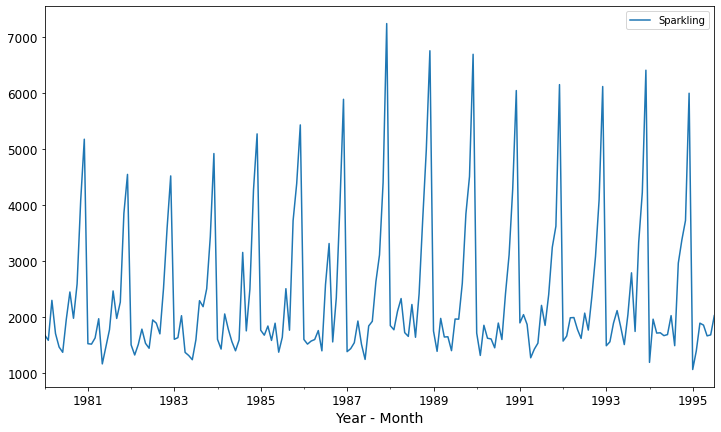

In [5]:
df.plot(figsize=(12,7))
plt.xlabel('Year - Month', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Basic EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [7]:
df.index.duplicated().sum()
# no duplicate values

0

In [8]:
df.index[0]
# start date of the data

Timestamp('1980-01-01 00:00:00')

In [9]:
df.index[-1]
#end date of the data

Timestamp('1995-07-01 00:00:00')

In [10]:
df['Sparkling'].isnull().sum()
# no missing values

0

In [11]:
data=df.copy()

In [12]:
data=df.copy()
dates = pd.date_range(start='1980-01-01', freq='MS', periods=len(data))
import calendar
data['Month'] = dates.month
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x]) #spltting into english month names 
data['Year'] = dates.year
data = data[['Month', 'Year', 'Sparkling']]
data.set_index(dates,inplace=True)
data

,Month,Year,Sparkling
1980-01-01,Jan,1980,1686
1980-02-01,Feb,1980,1591
1980-03-01,Mar,1980,2304
1980-04-01,Apr,1980,1712
1980-05-01,May,1980,1471
...,...,...,...
1995-03-01,Mar,1995,1897
1995-04-01,Apr,1995,1862
1995-05-01,May,1995,1670
1995-06-01,Jun,1995,1688


In [13]:
monthly_sales_data = pd.pivot_table(data, values = "Sparkling", columns = "Year", index = "Month")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Month,,,,,,,,,,,,,,,,
Jan,1686.0,1530.0,1510.0,1609.0,1609.0,1771.0,1606.0,1389.0,1853.0,1757.0,1720.0,1902.0,1577.0,1494.0,1197.0,1070.0
Feb,1591.0,1523.0,1329.0,1638.0,1435.0,1682.0,1523.0,1442.0,1779.0,1394.0,1321.0,2049.0,1667.0,1564.0,1968.0,1402.0
Mar,2304.0,1633.0,1518.0,2030.0,2061.0,1846.0,1577.0,1548.0,2108.0,1982.0,1859.0,1874.0,1993.0,1898.0,1720.0,1897.0
Apr,1712.0,1976.0,1790.0,1375.0,1789.0,1589.0,1605.0,1935.0,2336.0,1650.0,1628.0,1279.0,1997.0,2121.0,1725.0,1862.0
May,1471.0,1170.0,1537.0,1320.0,1567.0,1896.0,1765.0,1518.0,1728.0,1654.0,1615.0,1432.0,1783.0,1831.0,1674.0,1670.0
Jun,1377.0,1480.0,1449.0,1245.0,1404.0,1379.0,1403.0,1250.0,1661.0,1406.0,1457.0,1540.0,1625.0,1515.0,1693.0,1688.0
Jul,1966.0,1781.0,1954.0,1600.0,1597.0,1645.0,2584.0,1847.0,2230.0,1971.0,1899.0,2214.0,2076.0,2048.0,2031.0,2031.0
Aug,2453.0,2472.0,1897.0,2298.0,3159.0,2512.0,3318.0,1930.0,1645.0,1968.0,1605.0,1857.0,1773.0,2795.0,1495.0,NaN
Sep,1984.0,1981.0,1706.0,2191.0,1759.0,1771.0,1562.0,2638.0,2421.0,2608.0,2424.0,2408.0,2377.0,1749.0,2968.0,NaN


<AxesSubplot:xlabel='Month'>

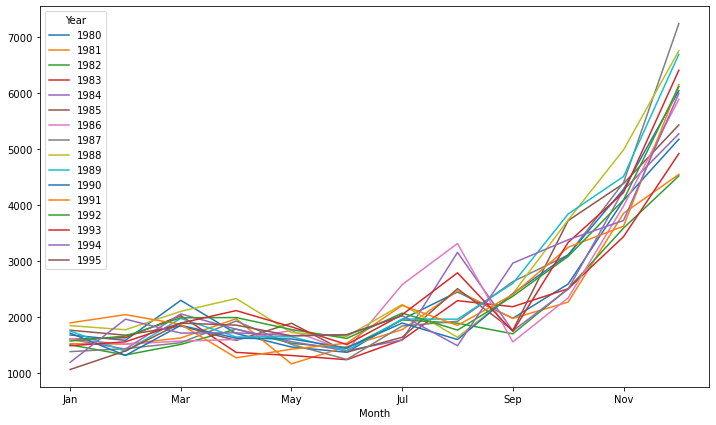

In [14]:
monthly_sales_data.plot(figsize=(12,7))

In [15]:
yearly_sales_data = pd.pivot_table(data, values = "Sparkling", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


<AxesSubplot:xlabel='Year'>

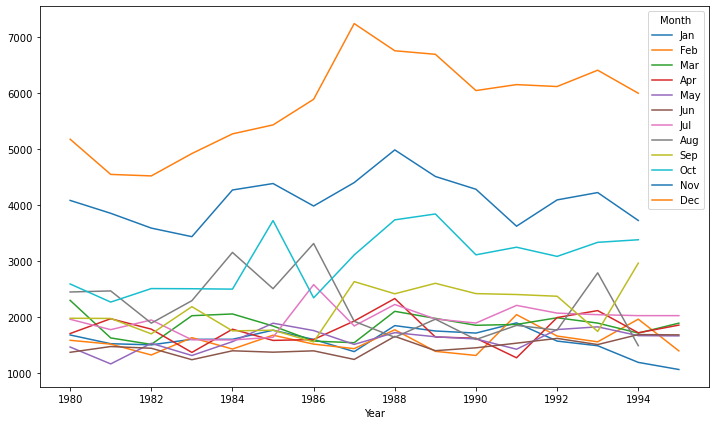

In [16]:
yearly_sales_data.plot(figsize=(12,7))

<AxesSubplot:xlabel='Month'>

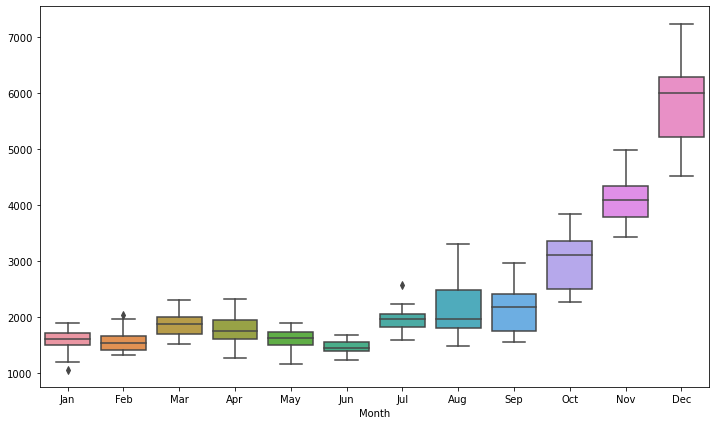

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(data=yearly_sales_data)

<AxesSubplot:xlabel='Year'>

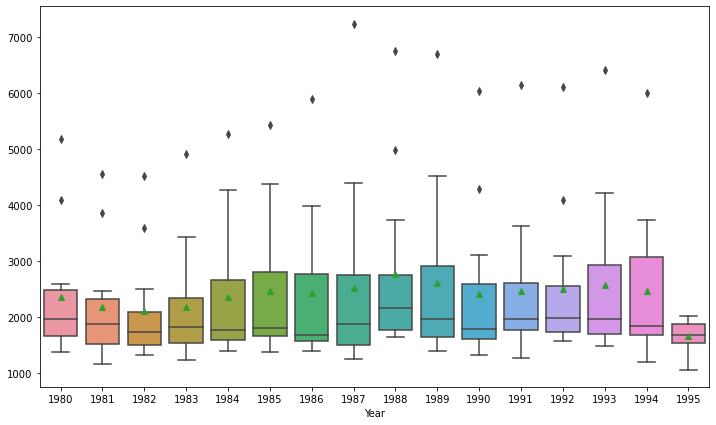

In [18]:
plt.figure(figsize=(12,7))

sns.boxplot(data=monthly_sales_data, showmeans=True)

In [19]:
df.describe().round(2)

,Sparkling
count,187.00
mean,2402.42
std,1295.11
min,1070.00
25%,1605.00
50%,1874.00
75%,2549.00
max,7242.00


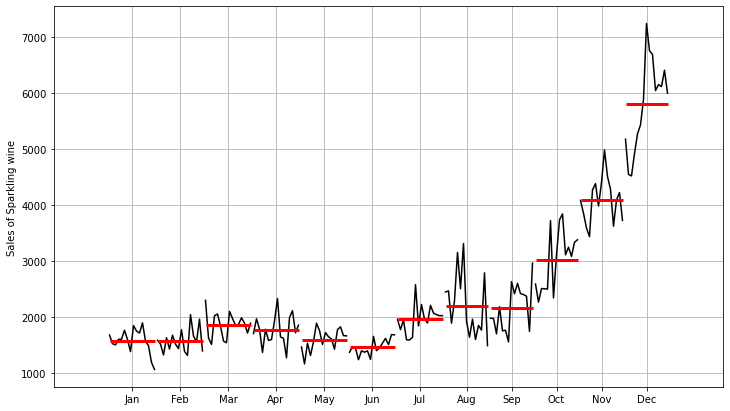

In [20]:
#month plot
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(12,7))

month_plot(df,ylabel='Sales of Sparkling wine',ax=ax)
plt.grid();

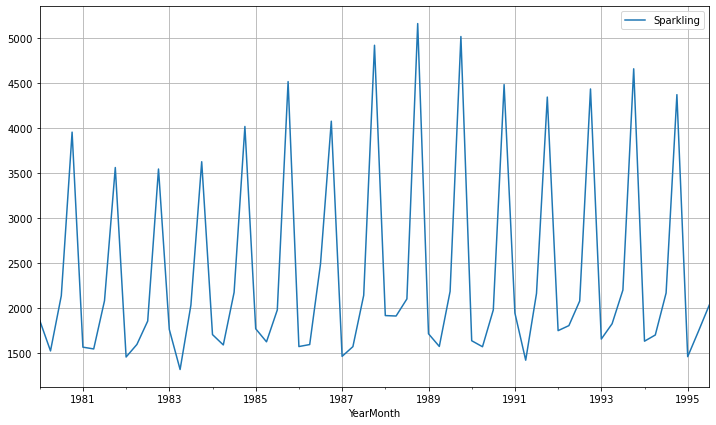

In [21]:
#quarterly plot
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot(figsize=(12,7));
plt.grid()

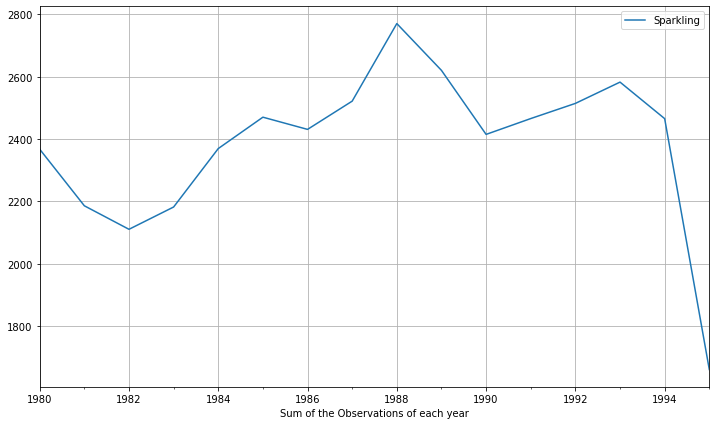

In [22]:
#yearly plot
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot(figsize=(12,7));
plt.grid()
plt.xlabel('Sum of the Observations of each year');

#### Additive Decomposition

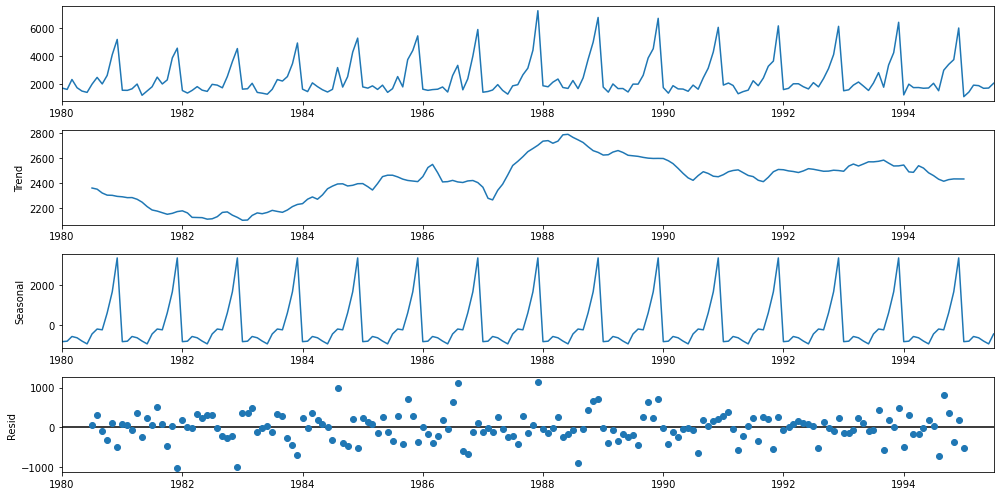

In [23]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

#### Multiplicative Decomposition

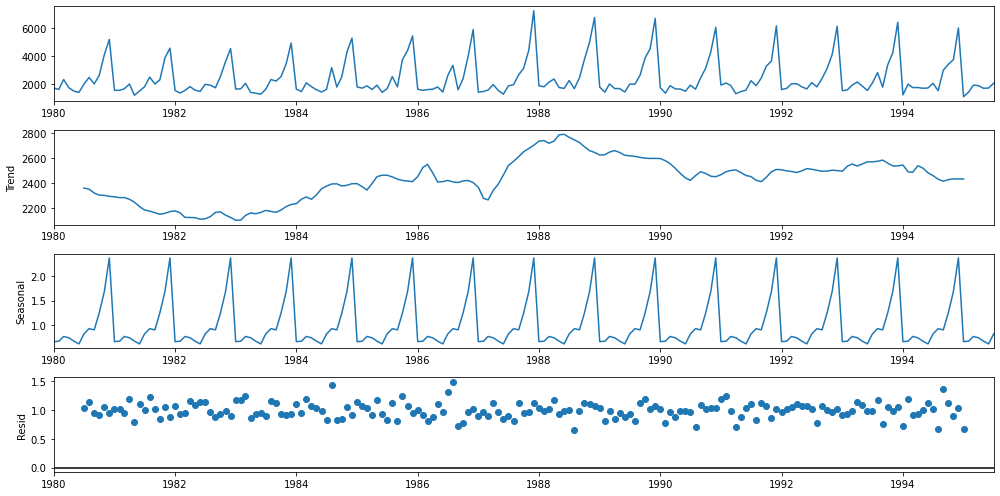

In [24]:
from    statsmodels.tsa.seasonal import   seasonal_decompose
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

### 3. Split the data into training and test. The test data should start in 1991.

In [25]:
train = df[df.index<'1991'] 
test  = df[df.index>='1991']

In [26]:
train

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471
...,...
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116


In [27]:
display(test.head())
display(test.tail())

,Sparkling
YearMonth,
1991-01-01,1902
1991-02-01,2049
1991-03-01,1874
1991-04-01,1279
1991-05-01,1432


,Sparkling
YearMonth,
1995-03-01,1897
1995-04-01,1862
1995-05-01,1670
1995-06-01,1688
1995-07-01,2031


In [28]:
test.shape

(55, 1)

### 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1: Linear Regression

In [29]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [30]:
print(train_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]


In [31]:
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5 

Last few rows of Training Data 
             Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132 

First few rows of Test Data 
             Sparkling  time
YearMonth                  
1991-01-01       1902   133
1991-02-01       2049   134
1991-03-01       1874   135
1991-04-01       1279   136
1991-05-01       1432   137 

Last few rows of Test Data 
             Sparkling  time
YearMonth                  
1995-03-01       1897   183
1995-04-01       1862   184
1995-05-01       1670   185
1995-06-01       1688   186
1995-07-01       2031   187 



In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [33]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Sparkling']
table1['Prediction']=test_predictions_model1
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,1902,2791.652093
1991-02-01,2049,2797.484752
1991-03-01,1874,2803.317410
1991-04-01,1279,2809.150069
1991-05-01,1432,2814.982727
1991-06-01,1540,2820.815386
1991-07-01,2214,2826.648044
1991-08-01,1857,2832.480703
1991-09-01,2408,2838.313361


In [34]:
test_predictions_model1

array([2791.65209345, 2797.48475196, 2803.31741046, 2809.15006896,
       2814.98272746, 2820.81538597, 2826.64804447, 2832.48070297,
       2838.31336147, 2844.14601998, 2849.97867848, 2855.81133698,
       2861.64399548, 2867.47665399, 2873.30931249, 2879.14197099,
       2884.9746295 , 2890.807288  , 2896.6399465 , 2902.472605  ,
       2908.30526351, 2914.13792201, 2919.97058051, 2925.80323901,
       2931.63589752, 2937.46855602, 2943.30121452, 2949.13387302,
       2954.96653153, 2960.79919003, 2966.63184853, 2972.46450703,
       2978.29716554, 2984.12982404, 2989.96248254, 2995.79514104,
       3001.62779955, 3007.46045805, 3013.29311655, 3019.12577506,
       3024.95843356, 3030.79109206, 3036.62375056, 3042.45640907,
       3048.28906757, 3054.12172607, 3059.95438457, 3065.78704308,
       3071.61970158, 3077.45236008, 3083.28501858, 3089.11767709,
       3094.95033559, 3100.78299409, 3106.61565259])

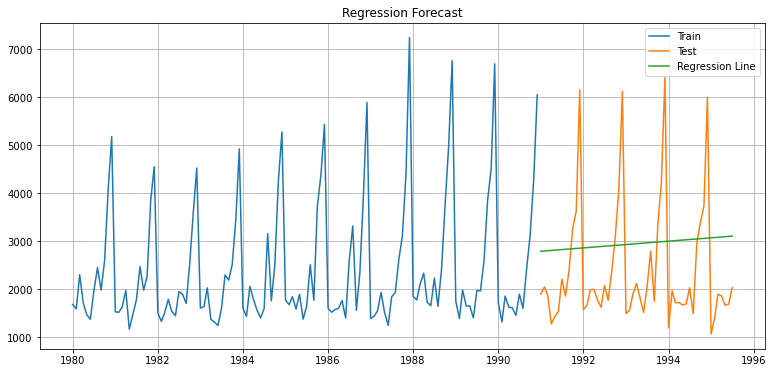

In [35]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression Line')
plt.legend(loc='best')
plt.grid()
plt.title('Regression Forecast');

#### Model Evaluation

In [36]:
from sklearn import metrics

In [37]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

resultsDf = pd.DataFrame({'Test RMSE': [round(rmse_model1_test,3)]},index=['Linear Regression'])
resultsDf

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


,Test RMSE
Linear Regression,1389.135


### Model 2: Naive Forecast Model

In [38]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()
train.tail()

,Sparkling
YearMonth,
1990-08-01,1605
1990-09-01,2424
1990-10-01,3116
1990-11-01,4286
1990-12-01,6047


In [39]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

In [40]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Sparkling']
table1['Prediction']=NaiveModel_test['naive']
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,1902,6047
1991-02-01,2049,6047
1991-03-01,1874,6047
1991-04-01,1279,6047
1991-05-01,1432,6047
1991-06-01,1540,6047
1991-07-01,2214,6047
1991-08-01,1857,6047
1991-09-01,2408,6047


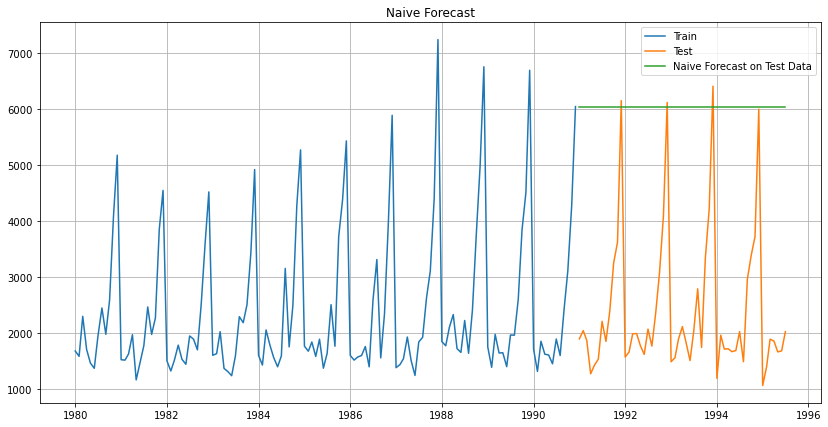

In [41]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.grid()

plt.title("Naive Forecast");

#### Model Evaluation

In [42]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For Naive model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

For Naive model forecast on the Test Data,  RMSE is 3864.279


,Test RMSE
Linear Regression,1389.135000
Naive Model,3864.279352


### Model 3: Simple Average Model

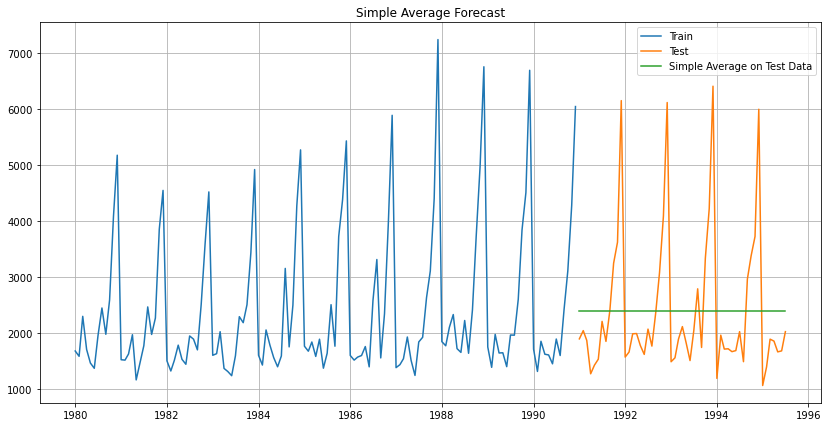

In [43]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()

plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.grid()
plt.title("Simple Average Forecast");

In [44]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Sparkling']
table1['Prediction']=SimpleAverage_test['mean_forecast']
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,1902,2403.780303
1991-02-01,2049,2403.780303
1991-03-01,1874,2403.780303
1991-04-01,1279,2403.780303
1991-05-01,1432,2403.780303
1991-06-01,1540,2403.780303
1991-07-01,2214,2403.780303
1991-08-01,1857,2403.780303
1991-09-01,2408,2403.780303


#### Model Evaluation

In [45]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))


resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]} ,index=['Simple Average Model'])
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

For Simple Average forecast on the Test Data,  RMSE is 1275.082


,Test RMSE
Linear Regression,1389.135000
Naive Model,3864.279352
Simple Average Model,1275.081804


# Moving Average

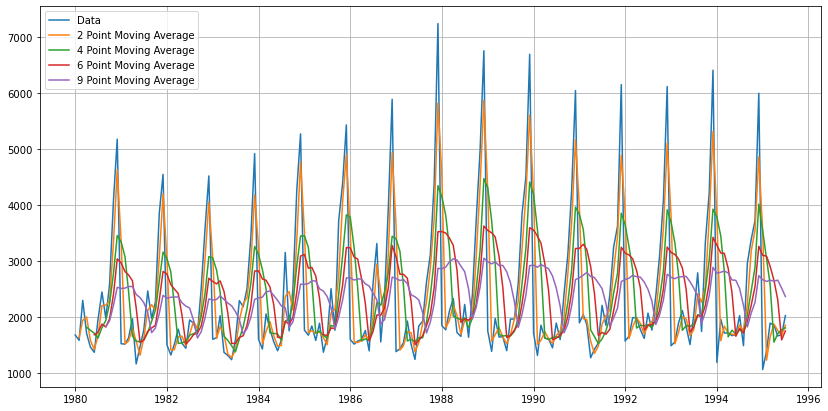

In [46]:
MovingAverage = df.copy()


# trailing moving averages
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

## Plotting on the whole data

plt.plot(MovingAverage['Sparkling'], label='Data')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();


In [47]:
MovingAverage[MovingAverage.index>='1991'].head(10)

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,
1991-01-01,1902,3974.5,3837.75,3230.000000,2705.666667
1991-02-01,2049,1975.5,3571.00,3304.000000,2753.888889
1991-03-01,1874,1961.5,2968.00,3212.333333,2800.222222
1991-04-01,1279,1576.5,1776.00,2906.166667,2731.333333
1991-05-01,1432,1355.5,1658.50,2430.500000,2712.111111
1991-06-01,1540,1486.0,1531.25,1679.333333,2613.888889
1991-07-01,2214,1877.0,1616.25,1731.333333,2513.666667
1991-08-01,1857,2035.5,1760.75,1699.333333,2243.777778
1991-09-01,2408,2132.5,2004.75,1788.333333,1839.444444


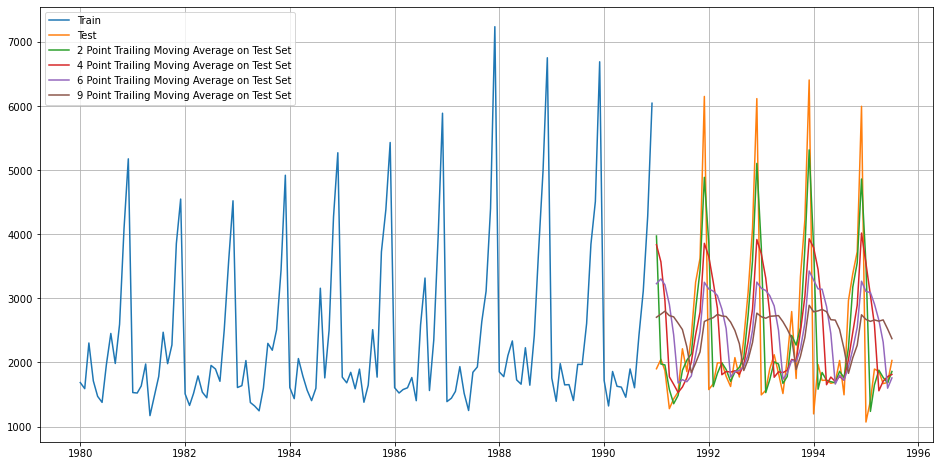

In [48]:
#Creating train and test set #Creating train and test set 
trailing_MovingAverage_train=MovingAverage[MovingAverage.index<'1991'] 
trailing_MovingAverage_test=MovingAverage[MovingAverage.index>='1991']

## Plotting on both the Training and Test data


plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')

plt.legend(loc = 'best')
plt.grid();

## Model Evaluation

In [49]:
## Test Data - RMSE  --> 2 point Trailing MA

rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA

rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [50]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
Linear Regression,1389.135000
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


### Model 4: Simple Exponential Smoothing

In [51]:
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Predictions of Simple Exponential Smoothing : 

1991-01-01    2804.675124
1991-02-01    2804.675124
1991-03-01    2804.675124
1991-04-01    2804.675124
1991-05-01    2804.675124
1991-06-01    2804.675124
1991-07-01    2804.675124
1991-08-01    2804.675124
1991-09-01    2804.675124
1991-10-01    2804.675124
1991-11-01    2804.675124
1991-12-01    2804.675124
1992-01-01    2804.675124
1992-02-01    2804.675124
1992-03-01    2804.675124
1992-04-01    2804.675124
1992-05-01    2804.675124
1992-06-01    2804.675124
1992-07-01    2804.675124
1992-08-01    2804.675124
1992-09-01    2804.675124
1992-10-01    2804.675124
1992-11-01    2804.675124
1992-12-01    2804.675124
1993-01-01    2804.675124
1993-02-01    2804.675124
1993-03-01    2804.675124
1993-04-01    2804.675124
1993-05-01    2804.675124
1993-06-01    2804.675124
1993-07-01    2804.675124
1993-08-01    2804.675124
1993-09-01    2804.675124
1993-10-01    2804.675124
1993-11-01    2804.675124
1993-12-01    2804.675124
1994-01-01    28

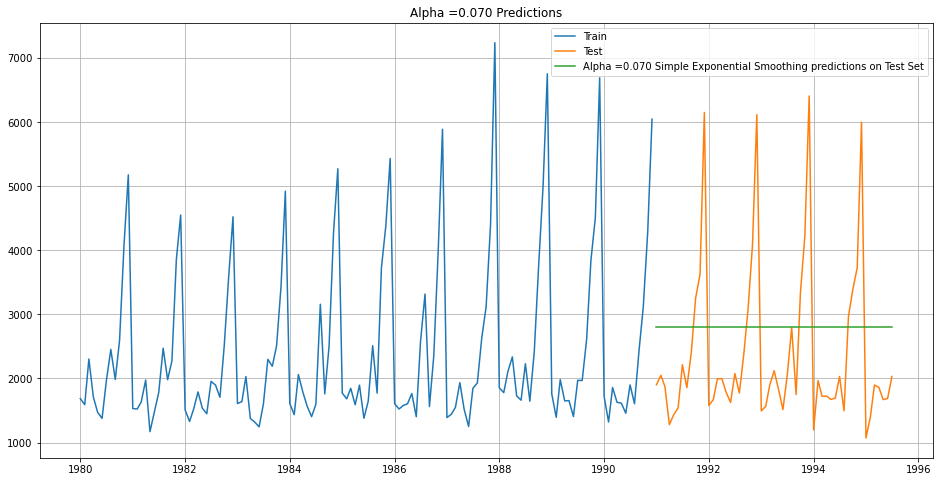

In [52]:
#initializing the model
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
#fitting the model
model_SES_autofit = model_SES.fit(optimized=True)

SES_predict = model_SES_autofit.forecast(steps=len(test))
print('Predictions of Simple Exponential Smoothing : \n')
print(SES_predict,'\n\n')

#checking the parameters
print('Parameters of SES :')
print(model_SES_autofit.params,'\n\n')#alpha = 0.07 which implies the prediction is not closely related to the previous value. 

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.070 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.070 Predictions');

In [53]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Sparkling']
table1['Prediction']=SES_predict
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,1902,2804.675124
1991-02-01,2049,2804.675124
1991-03-01,1874,2804.675124
1991-04-01,1279,2804.675124
1991-05-01,1432,2804.675124
1991-06-01,1540,2804.675124
1991-07-01,2214,2804.675124
1991-08-01,1857,2804.675124
1991-09-01,2408,2804.675124


#### Model Evaluation: 

In [54]:
rmse_model4_test=mean_squared_error(test.values,SES_predict.values,squared=False)
print('For the simple exponential smoothing on test data, RMSE is',rmse_model4_test)

resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test]} ,index=['Alpha = 0.07, SES'])
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

For the simple exponential smoothing on test data, RMSE is 1338.0083844916467


,Test RMSE
Linear Regression,1389.135000
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha = 0.07, SES",1338.008384


### Model 5: Double Exponential Smoothing (Holt Model)

Predictions of Double Exponential Smoothing : 

1991-01-01    5401.733026
1991-02-01    5476.005230
1991-03-01    5550.277433
1991-04-01    5624.549637
1991-05-01    5698.821840
1991-06-01    5773.094044
1991-07-01    5847.366248
1991-08-01    5921.638451
1991-09-01    5995.910655
1991-10-01    6070.182858
1991-11-01    6144.455062
1991-12-01    6218.727266
1992-01-01    6292.999469
1992-02-01    6367.271673
1992-03-01    6441.543876
1992-04-01    6515.816080
1992-05-01    6590.088284
1992-06-01    6664.360487
1992-07-01    6738.632691
1992-08-01    6812.904894
1992-09-01    6887.177098
1992-10-01    6961.449302
1992-11-01    7035.721505
1992-12-01    7109.993709
1993-01-01    7184.265912
1993-02-01    7258.538116
1993-03-01    7332.810320
1993-04-01    7407.082523
1993-05-01    7481.354727
1993-06-01    7555.626930
1993-07-01    7629.899134
1993-08-01    7704.171338
1993-09-01    7778.443541
1993-10-01    7852.715745
1993-11-01    7926.987948
1993-12-01    8001.260152
1994-01-01    80

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


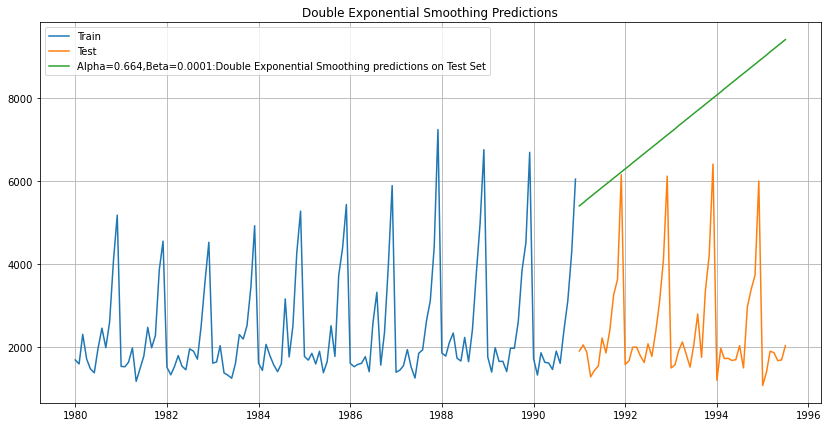

In [55]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')

# Fitting the model
model_DES = model_DES.fit(optimized=True)


# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
print('Predictions of Double Exponential Smoothing : \n')
print(DES_predict,'\n\n')

#checking the parameters
print('Parameters of DES :')
print(model_DES.params,'\n\n')


## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(DES_predict, label='Alpha=0.664,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')
plt.grid()

plt.legend(loc='best')
plt.title('Double Exponential Smoothing Predictions');

In [56]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Sparkling']
table1['Prediction']=DES_predict
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,1902,5401.733026
1991-02-01,2049,5476.005230
1991-03-01,1874,5550.277433
1991-04-01,1279,5624.549637
1991-05-01,1432,5698.821840
1991-06-01,1540,5773.094044
1991-07-01,2214,5847.366248
1991-08-01,1857,5921.638451
1991-09-01,2408,5995.910655


#### Model Evaluation: 

In [57]:
rmse_model5_test=mean_squared_error(test.values,DES_predict.values,squared=False)
print('For the double exponential smoothing on test data, RMSE is',rmse_model5_test)

resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test]} ,index=['Alpha = 0.66, Beta=0.0001, DES'])
resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

For the double exponential smoothing on test data, RMSE is 5291.8798332269125


,Test RMSE
Linear Regression,1389.135000
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha = 0.07, SES",1338.008384
"Alpha = 0.66, Beta=0.0001, DES",5291.879833


### Model 6: Triple Exponential Smoothing (Holt - Winter Model) - Multiplicative seasonality

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Predictions of Triple Exponential Smoothing : 

1991-01-01    1587.497468
1991-02-01    1356.394925
1991-03-01    1762.929755
1991-04-01    1656.165933
1991-05-01    1542.002730
1991-06-01    1355.102435
1991-07-01    1854.197719
1991-08-01    1820.513188
1991-09-01    2276.971718
1991-10-01    3122.024202
1991-11-01    4128.528561
1991-12-01    5890.064588
1992-01-01    1538.233708
1992-02-01    1314.193684
1992-03-01    1707.937498
1992-04-01    1604.369388
1992-05-01    1493.650618
1992-06-01    1312.499576
1992-07-01    1795.750753
1992-08-01    1762.976871
1992-09-01    2204.819253
1992-10-01    3022.831861
1992-11-01    3997.009544
1992-12-01    5701.930382
1993-01-01    1488.969948
1993-02-01    1271.992443
1993-03-01    1652.945240
1993-04-01    1552.572843
1993-05-01    1445.298507
1993-06-01    1269.896716
1993-07-01    1737.303788
1993-08-01    1705.440555
1993-09-01    2132.666788
1993-10-01    2923.639519
1993-11-01    3865.490526
1993-12-01    5513.796176
1994-01-01    14

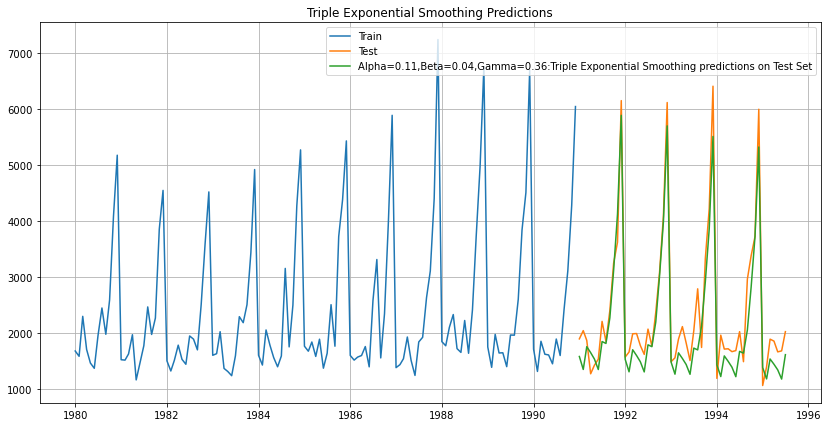

In [58]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()



# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
print('Predictions of Triple Exponential Smoothing : \n')
print(TES_predict_am,'\n\n')


#checking the parameters
print('Parameters of TES :')
print(model_TES_am.params,'\n\n')


## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict_am, label='Alpha=0.11,Beta=0.04,Gamma=0.36:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [59]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Sparkling']
table1['Prediction']=TES_predict_am
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,1902,1587.497468
1991-02-01,2049,1356.394925
1991-03-01,1874,1762.929755
1991-04-01,1279,1656.165933
1991-05-01,1432,1542.002730
1991-06-01,1540,1355.102435
1991-07-01,2214,1854.197719
1991-08-01,1857,1820.513188
1991-09-01,2408,2276.971718


#### Model Evaluation

In [60]:
rmse_model6_test=mean_squared_error(test.values,TES_predict_am.values,squared=False)
print('For the triple exponential smoothing on test data, RMSE is',rmse_model6_test)

resultsDf_6 = pd.DataFrame({'Test RMSE': [rmse_model6_test]} ,index=['Alpha=0.11, Beta=0.04, Gamma=0.36 TES(A,A,M)'])
resultsDf = pd.concat([resultsDf, resultsDf_6])
resultsDf

For the triple exponential smoothing on test data, RMSE is 404.286809456071


,Test RMSE
Linear Regression,1389.135000
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha = 0.07, SES",1338.008384
"Alpha = 0.66, Beta=0.0001, DES",5291.879833
"Alpha=0.11, Beta=0.04, Gamma=0.36 TES(A,A,M)",404.286809


### Model 7: Triple Exponential Smoothing (Holt - Winter Model) - Additive seasonality


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Predictions of Triple Exponential Smoothing : 

1991-01-01    1490.402890
1991-02-01    1204.525152
1991-03-01    1688.734182
1991-04-01    1551.226125
1991-05-01    1461.197883
1991-06-01    1278.646707
1991-07-01    1804.885616
1991-08-01    1678.955032
1991-09-01    2315.373126
1991-10-01    3224.976222
1991-11-01    4299.301434
1991-12-01    6410.712237
1992-01-01    1482.829908
1992-02-01    1196.952170
1992-03-01    1681.161200
1992-04-01    1543.653143
1992-05-01    1453.624901
1992-06-01    1271.073725
1992-07-01    1797.312634
1992-08-01    1671.382050
1992-09-01    2307.800144
1992-10-01    3217.403240
1992-11-01    4291.728452
1992-12-01    6403.139255
1993-01-01    1475.256926
1993-02-01    1189.379188
1993-03-01    1673.588218
1993-04-01    1536.080160
1993-05-01    1446.051919
1993-06-01    1263.500743
1993-07-01    1789.739652
1993-08-01    1663.809068
1993-09-01    2300.227162
1993-10-01    3209.830258
1993-11-01    4284.155470
1993-12-01    6395.566273
1994-01-01    14

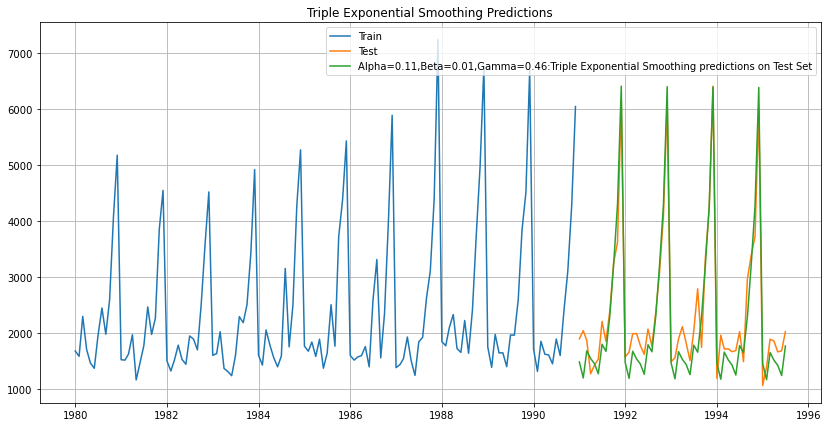

In [61]:
# Initializing the Double Exponential Smoothing Model
model_TES_aa = ExponentialSmoothing(train,trend='add',seasonal='add',initialization_method='estimated')
# Fitting the model
model_TES_aa = model_TES_aa.fit()



# Forecasting using this model for the duration of the test set
TES_predict_aa =  model_TES_aa.forecast(len(test))
print('Predictions of Triple Exponential Smoothing : \n')
print(TES_predict_aa,'\n\n')


#checking the parameters
print('Parameters of TES :')
print(model_TES_aa.params,'\n\n')


## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(TES_predict_aa, label='Alpha=0.11,Beta=0.01,Gamma=0.46:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Triple Exponential Smoothing Predictions');

In [62]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Sparkling']
table1['Prediction']=TES_predict_aa
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,1902,1490.402890
1991-02-01,2049,1204.525152
1991-03-01,1874,1688.734182
1991-04-01,1279,1551.226125
1991-05-01,1432,1461.197883
1991-06-01,1540,1278.646707
1991-07-01,2214,1804.885616
1991-08-01,1857,1678.955032
1991-09-01,2408,2315.373126


### Model Evaluation

In [63]:
rmse_model7_test=mean_squared_error(test.values,TES_predict_aa.values,squared=False)
print('For the triple exponential smoothing on test data, RMSE is',rmse_model7_test)

resultsDf_7 = pd.DataFrame({'Test RMSE': [rmse_model7_test]} ,index=['Alpha=0.11, Beta=0.01, Gamma=0.46 TES(A,A,A)'])
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

For the triple exponential smoothing on test data, RMSE is 378.95102286703


,Test RMSE
Linear Regression,1389.135000
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha = 0.07, SES",1338.008384
"Alpha = 0.66, Beta=0.0001, DES",5291.879833
"Alpha=0.11, Beta=0.04, Gamma=0.36 TES(A,A,M)",404.286809


### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## Stationarity Check

**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**<font color='blue'>Dickey-Fuller Test</font>** - Dicky Fuller Test on the timeseries is run to check for stationarity of data. 

- **Null Hypothesis $H_{0}$**: Time Series is non-stationary.
- **Alternate Hypothesis $𝑯_{𝒂}$**: Time Series is stationary.

**So Ideally if p-value < 0.05 then null hypothesis is rejected else we fail to reject the null hypothesis.**



**---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [64]:
sales_ts=df['Sparkling']

In [65]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(sales_ts)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -1.360
DF test p-value is 0.6011


 ***the p-value 0.6011 is very large, and not smaller than 0.05 and thus is not a stationary series.***

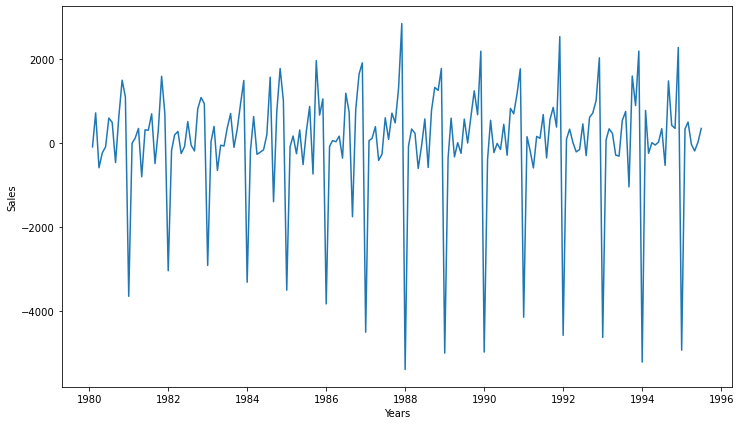

In [66]:
#Performing d=1 transformation : 
plt.figure(figsize=(12,7))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Sales');

In [67]:
diff=sales_ts.diff(periods=1).dropna()

In [68]:
dftest = adfuller(diff)#python implementation of dicky fuller test 
dftest
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

#p value is 0 which tells us that the differenced series is stationary.

DF test statistic is -45.050
DF test p-value is 0.0000


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

# ARIMA

In [69]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]),)
print('\n\n')  

    
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

#importing package
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

    
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
ARIMA_AIC.sort_values(by='AIC',ascending=True)

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)



ARIMA(0, 1, 0) - AIC:2267.6630357855465


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1679019561.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1679019561.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(1, 1, 0) - AIC:2266.6085393190087


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1679019561.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1679019561.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1679019561.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.con

ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.5272004508324


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1679019561.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1679019561.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1679019561.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


ARIMA(2, 1, 2) - AIC:2213.5092122831566


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1679019561.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)


,param,AIC
8,"(2, 1, 2)",2213.509212
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.5272
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 13 Aug 2023   AIC                           2213.509
Time:                        14:39:10   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.218      0.0

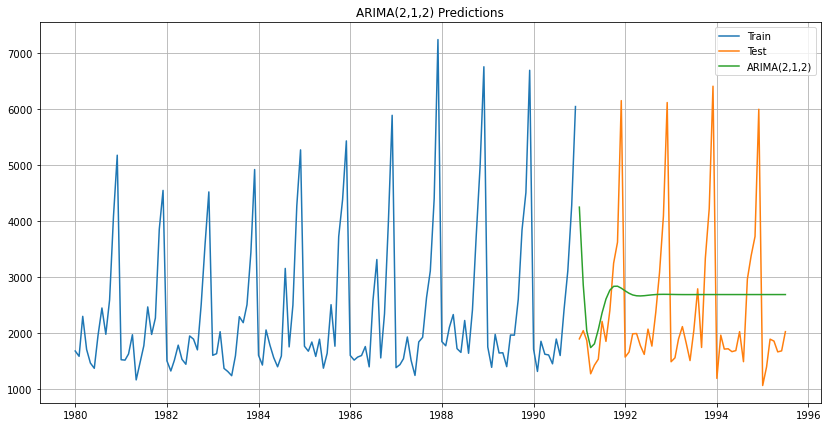

In [70]:
# building ARIMA with best p,d,q values
best_model = ARIMA(train, order = (2,1,2))
best_results = best_model.fit()

print(best_results.summary())

predicted_ARIMA = best_results.forecast(steps=len(test))

## Plotting the Training data, Test data and the forecasted values
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_ARIMA, label='ARIMA(2,1,2)')

plt.legend(loc='best')
plt.grid()
plt.title('ARIMA(2,1,2) Predictions');

In [71]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Sparkling']
table1['Prediction']=predicted_ARIMA
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,1902,4252.347924
1991-02-01,2049,2863.090133
1991-03-01,1874,2043.973171
1991-04-01,1279,1746.207340
1991-05-01,1432,1813.633672
1991-06-01,1540,2068.642722
1991-07-01,2214,2365.530665
1991-08-01,1857,2612.454374
1991-09-01,2408,2770.397088


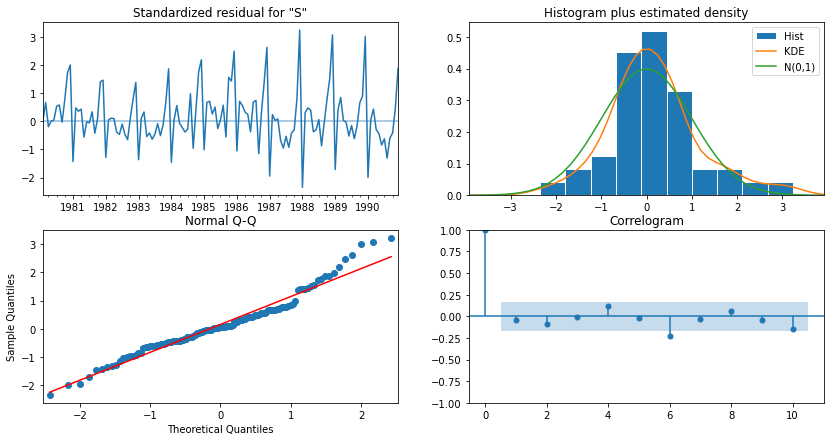

In [72]:

best_results.plot_diagnostics()
plt.show()

### Model Evaluation

In [73]:
rmse_arima = mean_squared_error(test['Sparkling'],predicted_ARIMA,squared=False)
print('For the model ARIMA(2,1,2) on test data, RMSE is',rmse_arima)


resultsDf_8 = pd.DataFrame({'Test RMSE': [rmse_arima]} ,index=['ARIMA(2,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

For the model ARIMA(2,1,2) on test data, RMSE is 1299.9796397916396


,Test RMSE
Linear Regression,1389.135000
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha = 0.07, SES",1338.008384
"Alpha = 0.66, Beta=0.0001, DES",5291.879833
"Alpha=0.11, Beta=0.04, Gamma=0.36 TES(A,A,M)",404.286809


# SARIMA

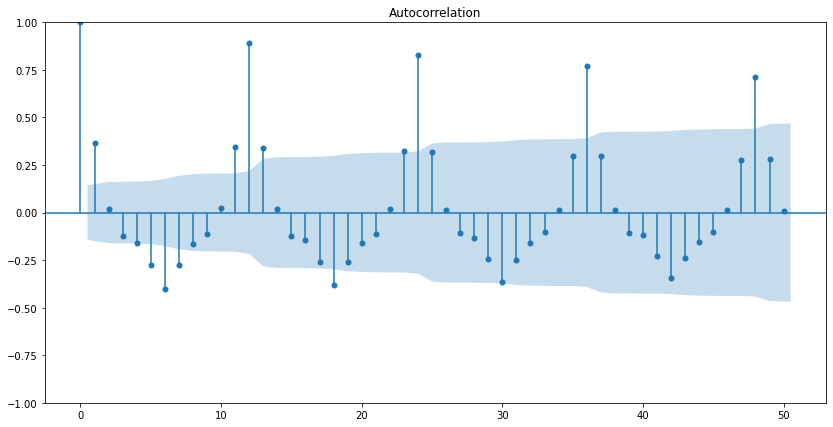

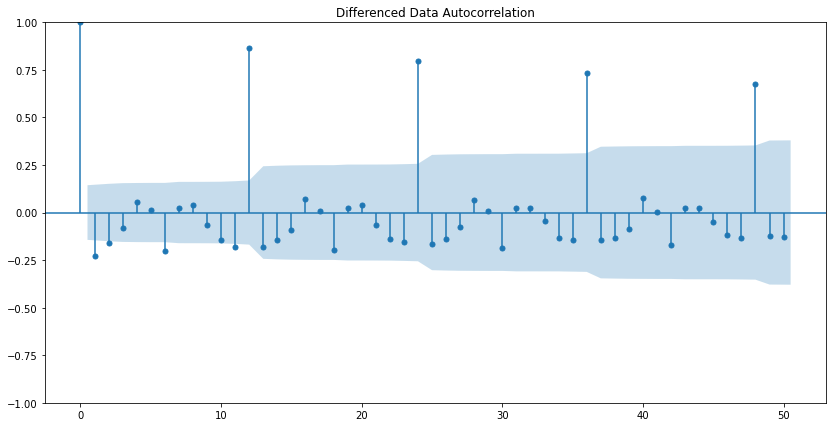

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

It is clear from the above plot that seasonality component for the SARIMA model should be 12. 

In [75]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))
print('\n\n')

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])


Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)





In [76]:

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236566
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301389083


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791705
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158611443


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920801
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505853


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.768864956687


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.708957288972


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838032


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.090319373017


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1319652484135


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176586


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245088165164


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824161124
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:2187.4410101687017


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:1887.9128007202285


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:1659.8789890857088


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:1790.0326332162715


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:1724.1675077971956


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:1557.1605067006255


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:1603.9654774499593


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:1600.5438800921174


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1557.1215638902927
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:2250.3181267386713


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1954.3938339903718


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:1721.2688476353958
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1811.2440279330933


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1788.5343592679392


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:1616.4894402563907


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:1621.6355080129133


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:1617.135613205786


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:1616.5412067533707
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:2204.934049154559


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1907.35589741287


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:1678.0981352633835


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:1775.1424466615247


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:1739.7167467829483


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:1571.3248863678778


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:1590.6161606872656


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:1586.3140614367558


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:1571.8069968622262
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:2188.4633450504807


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:1889.7708307504445


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:1659.6291421451472


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:1771.8259799530147


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:1723.9871793212103


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:1555.584246786726


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:1588.4216931923386


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:1585.5152937655243


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:1555.934563221006
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:2227.302761872421


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1946.4383435408604


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:1711.4123039835


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:1780.7646066059465


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:1756.935734715416


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:1600.9702204110845


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:1592.2403464860076


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:1587.6344991504284


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:1585.9191733905218
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:2199.858613145789


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:1905.0209495219829


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:1675.423408032862


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:1792.8234291874323


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:1740.0911276667364


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:1571.988828061324


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:1577.123506089688


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:1573.1595857703485


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:1572.3428646174457


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:2176.8681149359595


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:1892.2372612883312


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:1661.5523432239847


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:1757.2140931211306


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:1725.6005734246855


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:1557.3404034075916


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:1625.2273641149545


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:1573.5476069401338


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:1557.8401475884189


C:\Users\Admin\AppData\Local\Temp\ipykernel_872\1336364270.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)


In [77]:
#Sorting by least values of AIC
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934563
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121564
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340403


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -774.780
Date:                            Sun, 13 Aug 2023   AIC                           1563.560
Time:                                    14:40:21   BIC                           1582.071
Sample:                                01-01-1980   HQIC                          1571.059
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8698      0.119     -7.324      0.000      -1.103      -0.637
ma.L1         -0.0012      3.878   

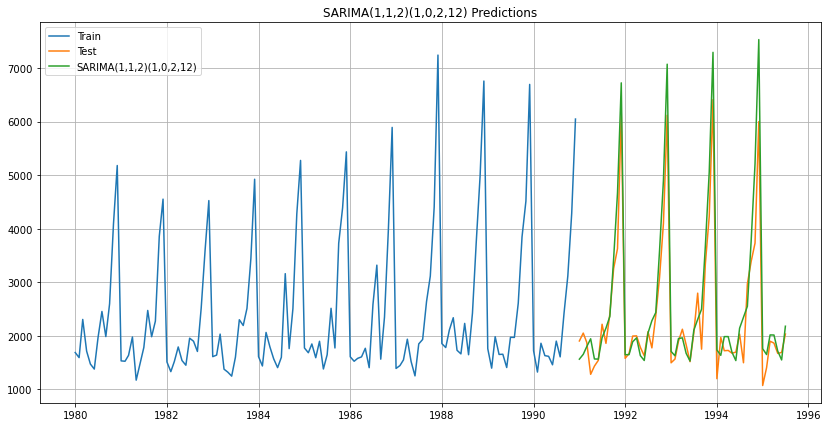

In [78]:
best_model = sm.tsa.statespace.SARIMAX(train,
                                      order=(1, 1, 2),
                                      seasonal_order=(1, 0, 2, 12),
                                      enforce_stationarity=False)
best_results = best_model.fit()

print(best_results.summary())

predicted_SARIMA = best_results.forecast(steps=len(test))

## Plotting the Training data, Test data and the forecasted values
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_SARIMA, label='SARIMA(1,1,2)(1,0,2,12)')

plt.legend(loc='best')
plt.grid()
plt.title('SARIMA(1,1,2)(1,0,2,12) Predictions');

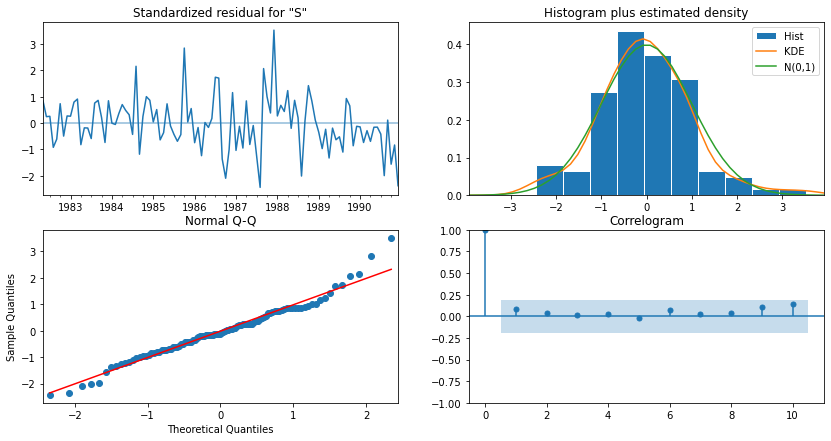

In [79]:
best_results.plot_diagnostics()
plt.show()

In [80]:
table1= pd.DataFrame()
table1.index= test.index
table1['Actual Values']=test['Sparkling']
table1['Prediction']=predicted_SARIMA
table1.head(10)

,Actual Values,Prediction
YearMonth,,
1991-01-01,1902,1562.067235
1991-02-01,2049,1652.122228
1991-03-01,1874,1796.845713
1991-04-01,1279,1942.934706
1991-05-01,1432,1565.746841
1991-06-01,1540,1562.905850
1991-07-01,2214,1963.324086
1991-08-01,1857,2142.358416
1991-09-01,2408,2361.195512


### Model Evaluation

In [81]:
rmse_sarima = mean_squared_error(test['Sparkling'],predicted_SARIMA,squared=False)
print('For the model SARIMA(1,1,2)(1,0,2,12) on test data, RMSE is',rmse_sarima)


resultsDf_9 = pd.DataFrame({'Test RMSE': [rmse_sarima]} ,index=['SARIMA(1,1,2)(1,0,2,12)'])
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

For the model SARIMA(1,1,2)(1,0,2,12) on test data, RMSE is 499.04784761315335


,Test RMSE
Linear Regression,1389.135000
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
"Alpha = 0.07, SES",1338.008384
"Alpha = 0.66, Beta=0.0001, DES",5291.879833
"Alpha=0.11, Beta=0.04, Gamma=0.36 TES(A,A,M)",404.286809


### 7. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [82]:
resultDf= resultsDf.sort_values(by='Test RMSE')
resultDf

,Test RMSE
"Alpha=0.11, Beta=0.01, Gamma=0.46 TES(A,A,A)",378.951023
"Alpha=0.11, Beta=0.04, Gamma=0.36 TES(A,A,M)",404.286809
"SARIMA(1,1,2)(1,0,2,12)",499.047848
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
Simple Average Model,1275.081804
6pointTrailingMovingAverage,1283.927428
"ARIMA(2,1,2)",1299.979640
"Alpha = 0.07, SES",1338.008384
9pointTrailingMovingAverage,1346.278315


In [92]:
result=pd.DataFrame()

result['Test RMSE']=resultDf['Test RMSE']

result.index=['TES(A,A,A)','TES(A,A,M)','SARIMA','Moving Average-1','Moving Average-2','Simple Average Model','Moving Average-3','ARIMA','SES','Moving Average-4','Linear Regression','Naive Model','DES']
result['Parameters']=['Alpha=0.11, Beta=0.01, Gamma=0.46','Alpha=0.11, Beta=0.04, Gamma=0.36','(1,1,2)(1,0,2,12)', '2 point', '4 point','','6 point','(2,1,2)','Alpha=0.07','9 point','','','Alpha = 0.66, Beta=0.0001']

result


,Test RMSE,Parameters
"TES(A,A,A)",378.951023,"Alpha=0.11, Beta=0.01, Gamma=0.46"
"TES(A,A,M)",404.286809,"Alpha=0.11, Beta=0.04, Gamma=0.36"
SARIMA,499.047848,"(1,1,2)(1,0,2,12)"
Moving Average-1,813.400684,2 point
Moving Average-2,1156.589694,4 point
Simple Average Model,1275.081804,
Moving Average-3,1283.927428,6 point
ARIMA,1299.979640,"(2,1,2)"
SES,1338.008384,Alpha=0.07
Moving Average-4,1346.278315,9 point


In [93]:
result1=pd.DataFrame()
result1.index=result.index
result1['Parameters']=result['Parameters']
result1['Test RMSE']=result['Test RMSE']
result1

,Parameters,Test RMSE
"TES(A,A,A)","Alpha=0.11, Beta=0.01, Gamma=0.46",378.951023
"TES(A,A,M)","Alpha=0.11, Beta=0.04, Gamma=0.36",404.286809
SARIMA,"(1,1,2)(1,0,2,12)",499.047848
Moving Average-1,2 point,813.400684
Moving Average-2,4 point,1156.589694
Simple Average Model,,1275.081804
Moving Average-3,6 point,1283.927428
ARIMA,"(2,1,2)",1299.979640
SES,Alpha=0.07,1338.008384
Moving Average-4,9 point,1346.278315


### 8. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

## Predictions based on TES Model (A,A,A) 

RMSE of the TES (A,A,A) model on the whole data: 368.1917239988654 


1995-08-01    1850.631377
1995-09-01    2455.482192
1995-10-01    3245.685345
1995-11-01    3872.823591
1995-12-01    6102.053507
1996-01-01    1214.770224
1996-02-01    1600.065582
1996-03-01    1857.536862
1996-04-01    1839.987548
1996-05-01    1678.317607
1996-06-01    1628.913033
1996-07-01    1989.662844
Freq: MS, dtype: float64

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 /n/n


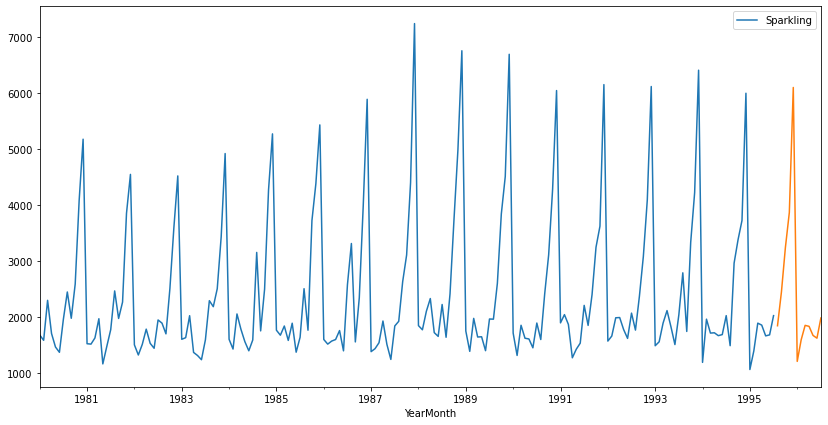

In [85]:
fullmodel1 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='additive').fit(smoothing_level=0.1112,
                                                                 smoothing_trend=0.0123,
                                                                 smoothing_seasonal=0.4607)

RMSE_fullmodel1 = metrics.mean_squared_error(df['Sparkling'],fullmodel1.fittedvalues,squared=False)

print('RMSE of the TES (A,A,A) model on the whole data:',RMSE_fullmodel1, '\n\n')

# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=12)
print(prediction_1,'/n/n')


df.plot()
prediction_1.plot();

,lower_CI,prediction,upper_CI
1995-08-01,1127.039982,1850.631377,2574.222772
1995-09-01,1731.890798,2455.482192,3179.073587
1995-10-01,2522.093951,3245.685345,3969.276740
1995-11-01,3149.232196,3872.823591,4596.414986
1995-12-01,5378.462112,6102.053507,6825.644902
1996-01-01,491.178830,1214.770224,1938.361619
1996-02-01,876.474187,1600.065582,2323.656977
1996-03-01,1133.945467,1857.536862,2581.128257
1996-04-01,1116.396154,1839.987548,2563.578943
1996-05-01,954.726212,1678.317607,2401.909002


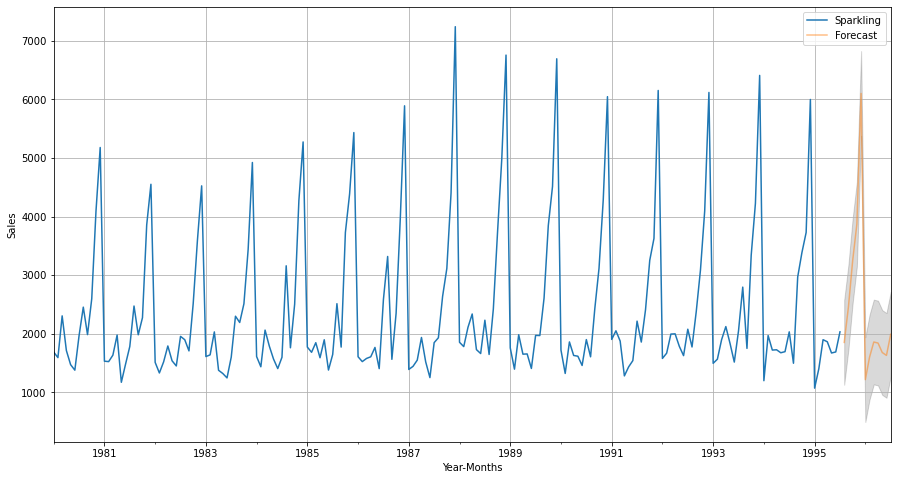

In [86]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_CI': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
display(pred_1_df)

print('\n\n')

# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_CI'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

## Predictions based on TES Model (A,A,M) 

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE of the TES (A,A,M) model on the whole data: 351.3948798238092 


1995-08-01    1875.803268
1995-09-01    2394.504723
1995-10-01    3169.074584
1995-11-01    3828.719369
1995-12-01    5941.619652
1996-01-01    1280.533608
1996-02-01    1598.036361
1996-03-01    1836.859189
1996-04-01    1810.004400
1996-05-01    1652.384060
1996-06-01    1585.497085
1996-07-01    1955.553576
Freq: MS, dtype: float64 /n/n


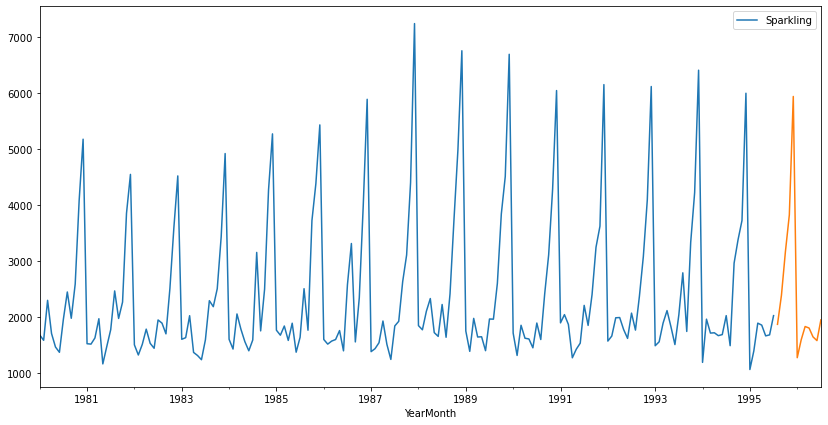

In [87]:
fullmodel2 = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.1113,
                                                                 smoothing_trend=0.0495,
                                                                 smoothing_seasonal=0.3620)

RMSE_fullmodel2 = metrics.mean_squared_error(df['Sparkling'],fullmodel2.fittedvalues,squared=False)
print('RMSE of the TES (A,A,M) model on the whole data:',RMSE_fullmodel2, '\n\n')

# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel2.forecast(steps=12)
print(prediction_1,'/n/n')


df.plot()
prediction_1.plot();



,lower_CI,prediction,upper_CI
1995-08-01,1185.271242,1875.803268,2566.335294
1995-09-01,1703.972697,2394.504723,3085.036749
1995-10-01,2478.542558,3169.074584,3859.606610
1995-11-01,3138.187343,3828.719369,4519.251395
1995-12-01,5251.087626,5941.619652,6632.151678
1996-01-01,590.001582,1280.533608,1971.065634
1996-02-01,907.504335,1598.036361,2288.568387
1996-03-01,1146.327163,1836.859189,2527.391215
1996-04-01,1119.472374,1810.004400,2500.536426
1996-05-01,961.852034,1652.384060,2342.916086


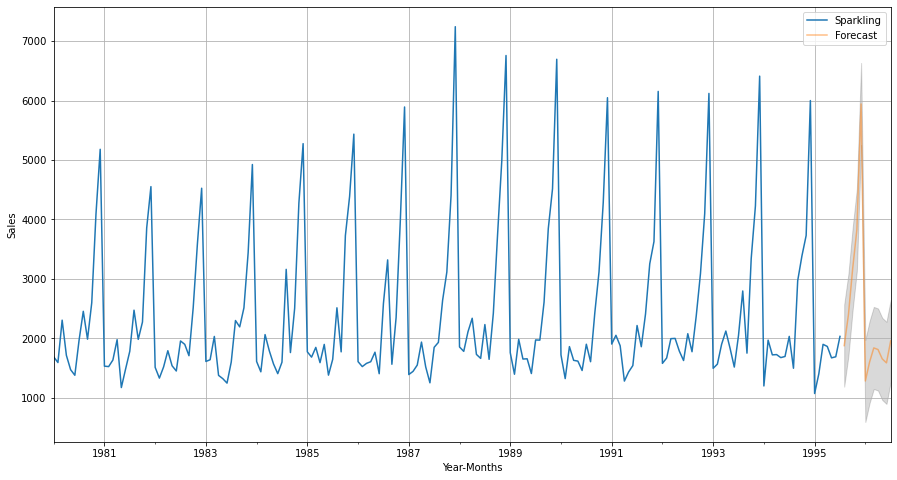

In [88]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel2.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_CI': prediction_1 + 1.96*np.std(fullmodel2.resid,ddof=1)})
display(pred_1_df)

print('\n\n')

# plot the forecast along with the confidence band

axis = df.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_CI'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()

## Predictions based on SARIMA

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.413
Date:                            Sun, 13 Aug 2023   AIC                           2360.826
Time:                                    14:40:26   BIC                           2382.308
Sample:                                01-01-1980   HQIC                          2369.549
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6610      0.242     -2.733      0.006      -1.135      -0.187
ma.L1         -0.1801      0.219   

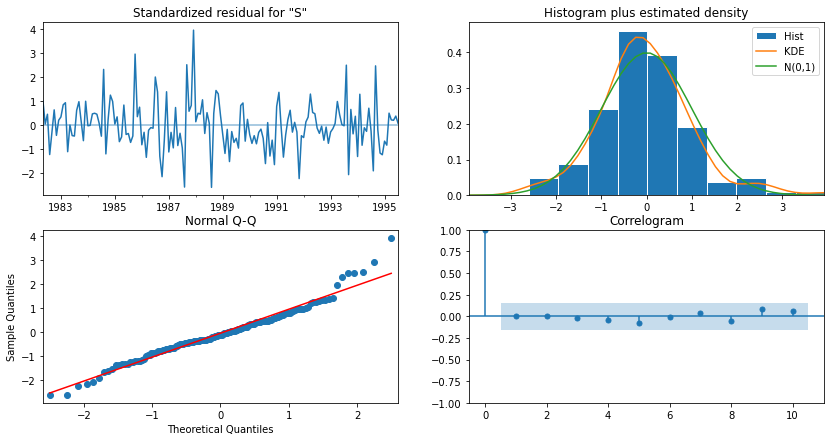

In [89]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1,1,2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())


print('\n\n\n') 

rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the model SARIMA(1,1,2)(1,0,2,12) on the whole data:',rmse)
print('\n\n') 

results_full_data_model.plot_diagnostics();


In [90]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head(12)

Sparkling,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,1836.396590,379.711496,1092.175733,2580.617448
1995-09-01,2489.558581,384.474750,1736.001918,3243.115245
1995-10-01,3324.577326,384.580437,2570.813520,4078.341132
1995-11-01,4020.221241,386.338641,3263.011418,4777.431064
1995-12-01,6289.984769,386.393227,5532.667961,7047.301577
1996-01-01,1244.697941,387.303694,485.596650,2003.799233
1996-02-01,1533.162049,387.532106,773.613079,2292.711019
1996-03-01,1821.697804,388.159236,1060.919682,2582.475926
1996-04-01,1788.494029,388.499346,1027.049302,2549.938756
1996-05-01,1627.572401,389.018535,865.110082,2390.034720


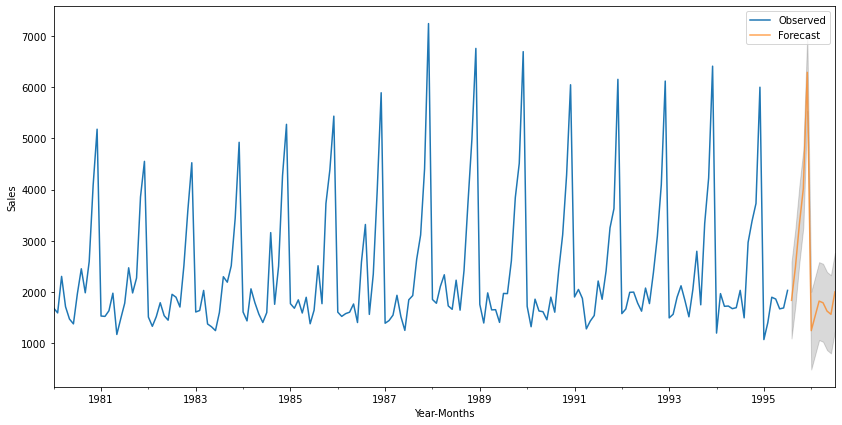

In [91]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

# plot the forecast along with the confidence band

axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

### 9. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.